In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

-1.0375713764547307
0.3815562393392072


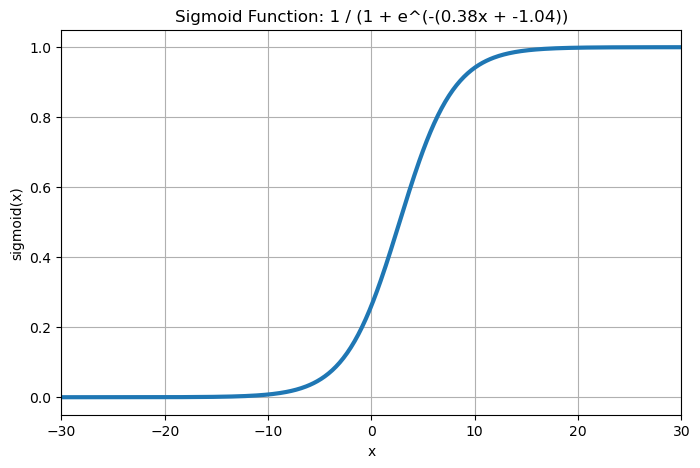

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

model = LogisticRegression(solver='liblinear')
model.fit(X, Y)

b0 = model.intercept_[0]
b1 = model.coef_[0][0]

print(b0)
print(b1)
x = np.linspace(-30, 30, 500)

# # e = 2.718281828459045

sigmoid =  1 / (1 + np.exp(-(b0 + b1 * x)))

plt.figure(figsize=(8, 5))
plt.plot(x, sigmoid, linewidth=3)
plt.title(f"Sigmoid Function: 1 / (1 + e^(-({b1:.2f}x + {b0:.2f}))")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.xlim(-30, 30)
plt.grid(True)

plt.show()
                
# # np.exp(1)
# print( 1 / (1 + (2.71)**(-(2.197*6 - 11.052))))



-0.8903752693886727
0.01611300519436046
predict 49K: 0.4748118360791202
predict 49K: [0]
predict 49K: [[0.52518816 0.47481184]]
predict 49K for yes: 0.4748118360791202
predict 51K for yes: 0.48285372484719585
predict 55K: 0.49896000557508663
predict 55K: False
108 0.000531331265713697 0.7005313312657137
decision boundry:  108


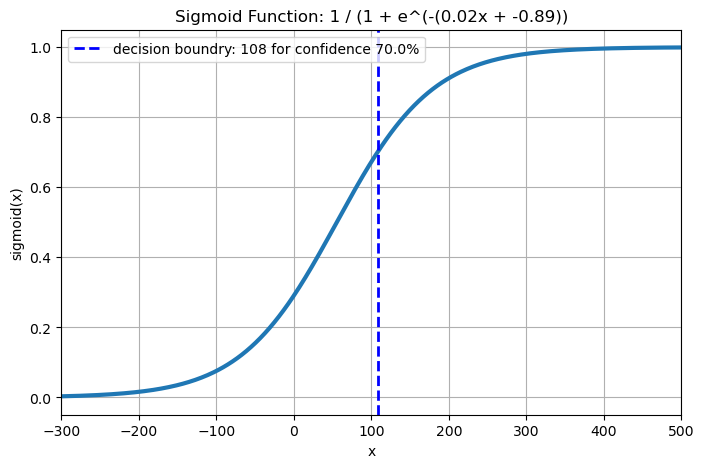

In [69]:

from sklearn.linear_model import LogisticRegression

# Data: Annual income and loan repayment (1=yes, 0=no)
X = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75]).reshape(-1, 1)
Y = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

# use skitlearn to build the graph
# what is the chance he will eturn the loan when x is 49K ?

model = LogisticRegression(solver='liblinear')
model.fit(X, Y)

b0 = model.intercept_[0]
b1 = model.coef_[0][0]

print(b0)
print(b1)

x = np.linspace(-400, 600, 500)

# # e = 2.718281828459045

sigmoid =  1 / (1 + np.exp(-(b1 * x + b0)))

plt.figure(figsize=(8, 5))
plt.plot(x, sigmoid, linewidth=3)
plt.title(f"Sigmoid Function: 1 / (1 + e^(-({b1:.2f}x + {b0:.2f}))")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.xlim(-300, 500)
plt.grid(True)



print('predict 49K:',  1 / (1 + np.exp(-(b1 * 49 + b0))))
print('predict 49K:',  model.predict([[49]]))
print('predict 49K:',  model.predict_proba([[49]]))
print('predict 49K for yes:',  model.predict_proba([[49]])[0][1])
print('predict 51K for yes:',  model.predict_proba([[49], [51]])[1][1])

# 1
confidence = 0.7
def get_predict(x) -> bool:
    proba = model.predict_proba([[49]])[0][1]
    return proba > confidence 

print('predict 55K:',  model.predict_proba([[55]])[0][1])
print('predict 55K:',  get_predict([[55]]))

# 2
# run from 0 to 100 and find decision boundry 
# find the X that is the most closest to the confidence  
# 0.65 0.72 
import math
best_i = None
best_diff = None
best_conf = None
for i in range(0, 150):
    proba = model.predict_proba([[i]])[0][1]
    if not best_diff or best_diff > abs(confidence - proba):
        best_diff = abs(confidence - proba)
        best_i = i
        best_proba = proba
        
print(best_i, best_diff, best_proba)
print("decision boundry: ", best_i)
plt.axvline(x=108, color="blue", linestyle="--", linewidth=2, label=f"decision boundry: {best_i} for confidence {confidence*100}%")
plt.legend()
plt.show()

In [72]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Data: Annual income and loan repayment (1=yes, 0=no)
X = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75]).reshape(-1, 1)
Y = np.array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1])

# use skitlearn to build the graph
# what is the chance he will eturn the loan when x is 49K ?

model = LogisticRegression(solver='liblinear')
model.fit(X, Y)

b0 = model.intercept_[0]
b1 = model.coef_[0][0]

print(b0)
print(b1)

y_pred = model.predict(X)

cm = confusion_matrix(Y, y_pred)
print("Confusion Matrix:")
print(cm)

# calc accuracy:
def get_accuaracy(cm) -> float:
    pass

-0.8903752693886727
0.01611300519436046
Confusion Matrix:
[[5 1]
 [1 3]]
